Using Suport Vector Machines for clasification of diabetes

Mean accuracy 0.7593750000000001
Standard deviation 0.02643453654260317


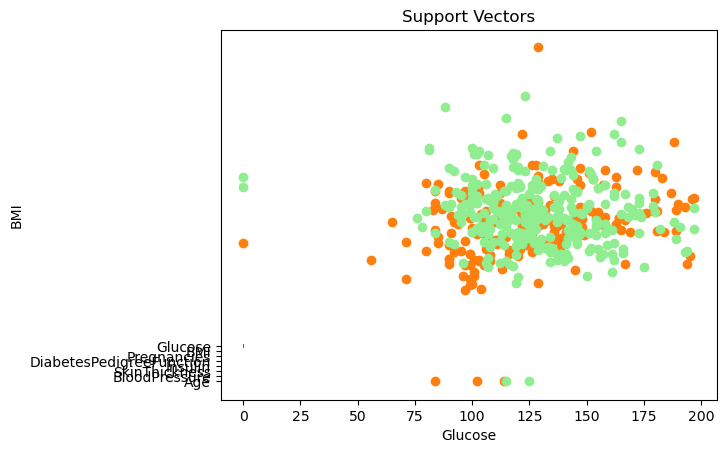

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

repeats = 30
accuracies = []

data = pd.read_csv("diabetes.csv")

dx = data.iloc[:, :-1]
dy = data.iloc[:, -1]

for i in range(0, repeats):
    dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size = 0.25)
    mySvm = svm.SVC(kernel="linear")
    mySvm.fit(dx_train, dy_train)
    dy_pred = mySvm.predict(dx_test)

    accuracies.append(accuracy_score(dy_test, dy_pred))

#print(accuracies)
print("Mean accuracy", np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
confusion_matrix(dy_test, dy_pred)

from sklearn.inspection import permutation_importance

features = data.columns
perm_importance = permutation_importance(mySvm, dx_test, dy_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Variable Importance")

support_vectors = mySvm.support_vectors_

plt.scatter(dx_test.iloc[:,1], dx_test.iloc[:,5])
plt.scatter(support_vectors[:,1], support_vectors[:,5], color="lightgreen")
plt.title("Support Vectors")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()
